In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Simulate nonsinusoidal rhythm
Nonsinusoidal rhythm with some variance in amplitude, period, and sawtoothness. But the average rise-decay symmetry is 0.2 (i.e. 20% of the cycle is in the rise and 80% is in the decay)

(0, 2)

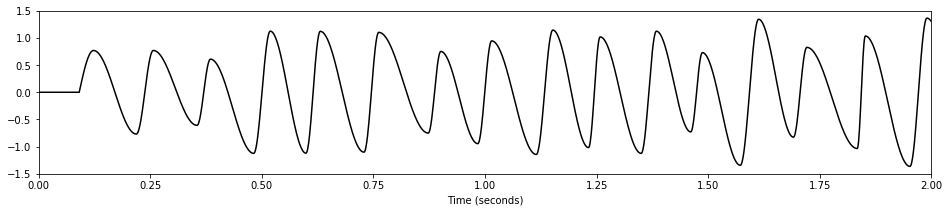

In [2]:
from neurodsp import sim
freq = 8
T = 60
Fs = 1000
x = sim.sim_bursty_oscillator(freq, T, Fs, rdsym = .2, prob_enter_burst=1, prob_leave_burst=0)

# Cut out buffer time
t = np.arange(0, T, 1/Fs)

# Plot signal
tlim = (0,2)
tidx = np.logical_and(t>=tlim[0], t<tlim[1])
plt.figure(figsize=(16,3))
plt.plot(t[tidx], x[tidx], 'k')
plt.xlabel('Time (seconds)')
plt.xlim(tlim)

# Filter nonsinusoidal rhythm 4-12 Hz and compute phase distribution
See function in [neurodsp](https://github.com/voytekresearch/neurodsp)

Text(0, 0.5, 'Number of samples')

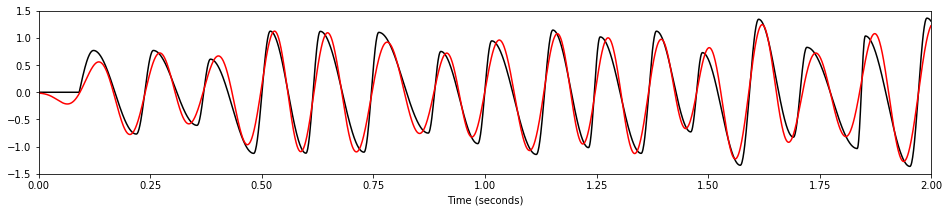

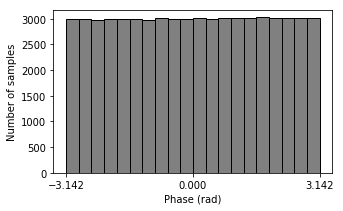

In [3]:
# Filter signal and compute phase time series
import neurodsp
from neurodsp import phase_by_time
f_range = (4, 12)
filter_length = .75 # Filter length in seconds
x_filt = neurodsp.filter(x, Fs, 'bandpass', fc=f_range, N_seconds = filter_length, remove_edge_artifacts=False)
pha = phase_by_time(x, Fs, f_range, filter_kwargs={'N_seconds': filter_length})

# Plot filtered signal on original
plt.figure(figsize=(16,3))
plt.plot(t[tidx], x[tidx], 'k')
plt.plot(t[tidx], x_filt[tidx], 'r')
plt.xlabel('Time (seconds)')
plt.xlim(tlim)

# Plot distribution of phase
plt.figure(figsize=(5,3))
plt.hist(pha, bins=np.linspace(-np.pi, np.pi, 21), color='.5', edgecolor='k');
plt.xticks([-np.pi, 0, np.pi])
plt.xlabel('Phase (rad)')
plt.ylabel('Number of samples')

# Filter signal 4-30Hz and recompute phase distribution

Text(0, 0.5, 'Number of samples')

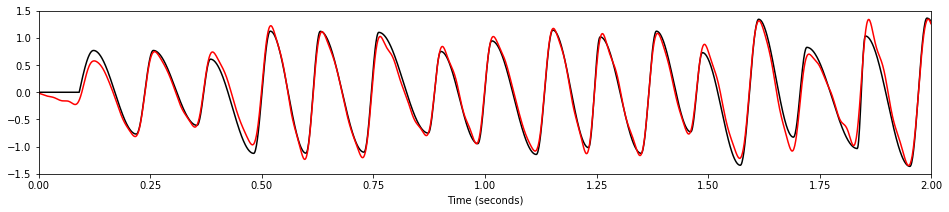

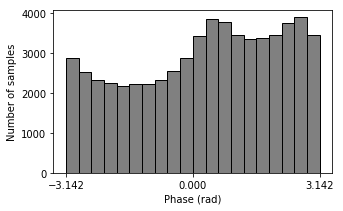

In [4]:
# Filter signal and compute phase time series
from neurodsp import phase_by_time
f_range = (4, 30)
filter_length = .75 # Filter length in seconds
x_filt = neurodsp.filter(x, Fs, 'bandpass', fc=f_range, N_seconds = filter_length, remove_edge_artifacts=False)
pha = phase_by_time(x, Fs, f_range, filter_kwargs={'N_seconds': filter_length})

# Plot filtered signal on original
plt.figure(figsize=(16,3))
plt.plot(t[tidx], x[tidx], 'k')
plt.plot(t[tidx], x_filt[tidx], 'r')
plt.xlabel('Time (seconds)')
plt.xlim(tlim)

# Plot distribution of phase
plt.figure(figsize=(5,3))
plt.hist(pha, bins=np.linspace(-np.pi, np.pi, 21), color='.5', edgecolor='k');
plt.xticks([-np.pi, 0, np.pi])
plt.xlabel('Phase (rad)')
plt.ylabel('Number of samples')

# Use waveform shape to compute phase

Text(0, 0.5, 'Number of samples')

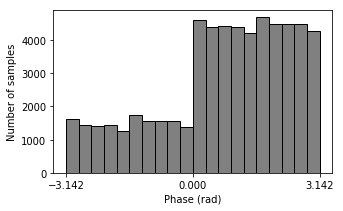

In [5]:
from neurodsp.shape.phase import extrema_interpolated_phase
from neurodsp.shape.cyclepoints import find_extrema, find_zerox

# Find peaks and troughs
f_range = (4,12)
Ps, Ts = find_extrema(x, Fs, f_range)

# Find rise and decay midpoints
zeroxR, zeroxD = find_zerox(x, Ps, Ts)

# Compute phase by interpolating these points
pha = extrema_interpolated_phase(x, Ps, Ts, zeroxR=zeroxR, zeroxD=zeroxD)

# Plot distribution of phase
plt.figure(figsize=(5,3))
plt.hist(pha, bins=np.linspace(-np.pi, np.pi, 21), color='.5', edgecolor='k');
plt.xticks([-np.pi, 0, np.pi])
plt.xlabel('Phase (rad)')
plt.ylabel('Number of samples')

# Save and load data

(0, 2000)

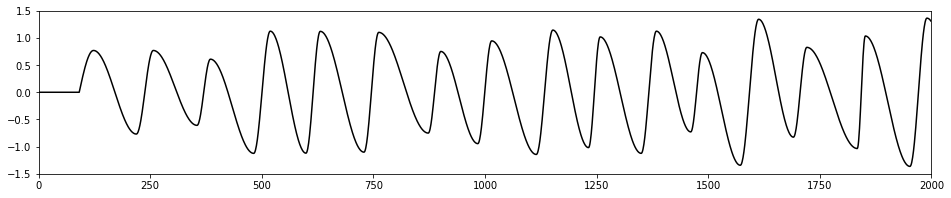

In [6]:
np.savetxt('nonsinusoidal.txt', x)
xload = np.loadtxt('nonsinusoidal.txt')

plt.figure(figsize=(16,3))
plt.plot(xload[:2000], 'k')
plt.xlim((0,2000))